<h1><center><font size="6">Predicting Energy Consumption </font></center></h1>

<h2><center><font size="4">Dataset used:Kaggle </font></center></h2>

<h3><center><font size="4"> https://datahack.analyticsvidhya.com/contest/janatahack-time-series-forecasting/True/</font></center></h2>

In [39]:
# Repeat Day 5 but 
# take out the day of the month variable. It works babe!

# segment the hours by morning, noon, evening and night. Slight improvement
# segment dayofweek into weekdays and weekends. Another improvement
# Note that binning the temperature or season gave no improvement

<a id="top"></a> <br>
## Table of  Contents
1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load packages](#21)
    1. [Define Metadata](#22)
    
1. [Load Data & Sort](#3)

1. [Data Cleansing](#4)
    1. [Data Type Conversion](#41)
        1. [Encoding Categories](#411)
        1. [Converting to Datetime](#412)
        
1. [Feature Engineering](#5)

1. [Modelling Workflow](#6)
    1. [Data Prep](#61)
        1. [Feature Target Split](#613)
        1. [Train-Test Split](#614)
    1. [Predictive Modelling](#63)
        1. [ML Model Fitting](#631)
        1. [Model Performance Metrics Report](#632)
    
1. [References](#7)

# <a id='1'>Introduction</a>  

Company of Electrolysia supplies electricity to the city. It is looking to optimise its electricity production based on the historical electricity consumption of the people of Electrovania. 
 
The company has hired you as a Data Scientist to investigate the past consumption and the weather information to come up with a model that catches the trend as accurately as possible. You have to bear in mind that there are many factors that affect electricity consumption and not all can be measured. Electrolysia has provided you this data on hourly data spanning five years. 
 
For this competition, the training set is comprised of the first 23 days of each month and the test set is the 24th to the end of the month, where the public leaderboard is based on the first two days of test, whereas the private leaderboard considers the rest of the days. Your task is to predict the electricity consumption on hourly basis.

## <a id='2'>Initialization</a>  


### <a id='21'>Load Packages</a>  

Load the minimum number of packages to get started and add more as we go along

In [40]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

import os

import sys
# sys.path.append("/home/paperspace/Kaggle Grandmaster/Udemy Superstar/Classification") # Adds higher directory to python modules path.


### <a id='22'>Define Metadata</a>  

In [41]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'electricity_consumption'

input_file_name = 'train_6BJx641.csv'
sample_submission_file_name = 'sample_submission_bYgKb77.csv'
test_file_name = 'test_pavJagI.csv'

intermediate_data_path = '../intermediate data/'

output_df_file_name = 'day6_cleaned_df_output_' 

# Enter the date in which this notebook is run
export_date = '2020503'

In [42]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('input'))
# This will list all the files in this folder

['sample_submission_bYgKb77.csv', 'test_pavJagI.csv', 'train_6BJx641.csv']


## <a id='3'>Load Data & Sort</a>  

In [43]:
df = pd.read_csv('input/' + input_file_name, index_col='ID')
df.sample(5)

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
ID,,,,,,,
4922,2014-01-22 02:00:00,13.6,13.6,967.0,3.295,C,216.0
47,2013-07-02 23:00:00,-8.6,-15.0,995.0,4.545,A,258.0
16595,2015-05-23 11:00:00,1.4,-2.9,989.0,8.775,A,294.0
26425,2016-07-06 01:00:00,-4.3,-7.1,1000.0,3.030,A,339.0
20699,2015-11-10 11:00:00,15.7,-9.3,968.0,3.290,A,210.0


#### Date time sorting

In [44]:
# Get the time series sorted here
df['datetime'] = df.sort_values('datetime')
df.head()

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
ID,,,,,,,
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


## <a id=4 > Data Cleansing

### <a id='41'>Data Type Conversion</a> 

#### <a id='411'>Encoding Categories</a> 

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['var2'] = label_encoder.fit_transform(df['var2'])

#### <a id='411'>Datetime conversion 

In [46]:
# Convert the column into datetime 
df['datetime'] = pd.to_datetime(df['datetime'])

In [47]:
df.head()

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
ID,,,,,,,
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,216.0
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,210.0
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,225.0
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,216.0
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,222.0


#### EDA

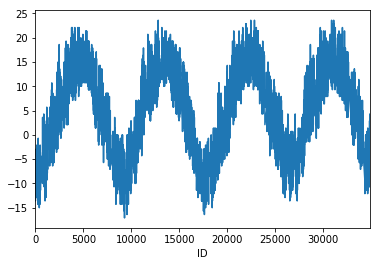

In [48]:
# Plot the temperature to see how the variation looks like across season and time of day

df['temperature'].plot()
# The bands within the day are not more than 10 C
# But the range across seasons can be upto 40 C

### <a id = 5> Feature Engineering

#### <a id = 51> Extracting Time fields

In [ ]:
def time_feature_engineering_function(dataframe, time_column):
    
    """
    Args: dataframe and the timeseries column called time_column
    Assumption: time_column already has the hour day month year information
    Logic: generate 8 possible combinations of the time_column column 
    Returns: The original dataframe with the new feature engineered columns + names of those columns
    
    """
    
    # Then use the above column to split up into respective time components 
    # in which there might be seasonality
    dataframe['hour'] = dataframe[time_column].dt.hour
    
    dataframe['dayofweek'] = dataframe[time_column].dt.dayofweek
    dataframe['dayofmonth'] = dataframe[time_column].dt.day
    dataframe['dayofyear'] = dataframe[time_column].dt.dayofyear
    
    dataframe['weekofyear'] = dataframe[time_column].dt.weekofyear
    dataframe['quarter'] = dataframe[time_column].dt.quarter
    dataframe['month'] = dataframe[time_column].dt.month
    dataframe['year'] = dataframe[time_column].dt.year
    
    new_col_name_list = ['hour','dayofweek','dayofmonth','dayofyear','weekofyear','quarter','month','year']
    
    return dataframe, new_col_name_list


In [49]:
# Use the datetime column to generate additional categorical features
# from helper_functions_comprehensive import time_feature_engineering_function

df, _ = time_feature_engineering_function(df, time_column='datetime')
df.head()

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,hour,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year
ID,,,,,,,,,,,,,,,
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,216.0,0,0,1,182,27,3,7,2013
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,210.0,1,0,1,182,27,3,7,2013
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,225.0,2,0,1,182,27,3,7,2013
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,216.0,3,0,1,182,27,3,7,2013
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,222.0,4,0,1,182,27,3,7,2013


In [50]:
# df['electricity_consumption'].plot()

In [51]:
# from helper_functions_comprehensive import numerical_distribution_function
# numerical_distribution_function(df[['electricity_consumption']])

#### NTFU Get each season's temperature IQR

In [52]:
# winter_month_list = [11,12,1,2]
# spring_month_list = [3,4]
# summer_month_list = [5,6,7,8]
# fall_month_list = [9,10]

# winter_df = df[df['month'].isin(winter_month_list)].copy()
# spring_df = df[df['month'].isin(spring_month_list)].copy()
# summer_df = df[df['month'].isin(summer_month_list)].copy()
# fall_df = df[df['month'].isin(fall_month_list)].copy()

In [53]:
# # Get each dataframe's IQR
# winter_df['temperature'].quantile([0.25,0.75]).values

In [54]:
# summer_df['temperature'].quantile([0.25,0.75]).values

In [55]:
# fall_df['temperature'].quantile([0.25,0.75]).values

In [56]:
# spring_df['temperature'].quantile([0.25,0.75]).values

#### <a id = 52> Segment hours, day of week and temperature

In [57]:
# # roughly segmented by the working hours

hour_bin_map_dict = {21:0, 22:0, 23:0, 0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0,
                    7:1, 8:1, 9:1, 10:1, 11:2, 12:2, 13:2, 14:2, 15:2, 16:2, 17:2,
                    18:3, 19:3, 20:3}

df['binned_hour'] = df['hour'].map(hour_bin_map_dict)

# Repeat segmentation by weekend vs weekday
week_bin_map_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1}

df['binned_week'] = df['dayofweek'].map(week_bin_map_dict)

# # # temperature bin thresholds should be the IQR for each season
# temp_bins = [-np.inf, 0, 7, 14, np.inf]
# temp_bin_names = [1,2,3,4]

# df['temp_range'] = pd.cut(df['temperature'], temp_bins, labels=temp_bin_names)

df.head()

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,hour,dayofweek,dayofmonth,dayofyear,weekofyear,quarter,month,year,binned_hour,binned_week
ID,,,,,,,,,,,,,,,,,
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,216.0,0,0,1,182,27,3,7,2013,0,0
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,210.0,1,0,1,182,27,3,7,2013,0,0
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,225.0,2,0,1,182,27,3,7,2013,0,0
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,216.0,3,0,1,182,27,3,7,2013,0,0
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,222.0,4,0,1,182,27,3,7,2013,0,0


In [58]:
# df['temp_range'] = df['temp_range'].astype('int32')

In [59]:
# del df['temperature']

In [60]:
# del df['hour']
# del df['dayofweek']

In [61]:
del df['dayofmonth']

In [62]:
del df['datetime']
df.head()

,temperature,var1,pressure,windspeed,var2,electricity_consumption,hour,dayofweek,dayofyear,weekofyear,quarter,month,year,binned_hour,binned_week
ID,,,,,,,,,,,,,,,
0,-11.4,-17.1,1003.0,571.910,0,216.0,0,0,182,27,3,7,2013,0,0
1,-12.1,-19.3,996.0,575.040,0,210.0,1,0,182,27,3,7,2013,0,0
2,-12.9,-20.0,1000.0,578.435,0,225.0,2,0,182,27,3,7,2013,0,0
3,-11.4,-17.1,995.0,582.580,0,216.0,3,0,182,27,3,7,2013,0,0
4,-11.4,-19.3,1005.0,586.600,0,222.0,4,0,182,27,3,7,2013,0,0


## <a id = 6 > Hyperparam tuning

### <a id = 61 > Feature Target and Train Test split

In [63]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]


# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <a id = 62 > Initialize XGBoost Search Space

In [64]:
# !pip install xgboost

In [65]:
from xgboost import XGBRegressor

from collections import Counter

hyper_param_space_dict = Counter()
hyper_param_space_dict['XGBoost'] = {
    
    'random_state': [42],
    'n_estimators':[100, 200],
    'max_depth': [3, 5, 7], 
    'colsample_bytree':[0.5, 0.7, 1],
    
    'objective':['reg:squarederror'],
    'early_stopping_rounds':[5],
}

### <a id = 63 > GridSearchCV

In [66]:
%%time
from sklearn.model_selection import GridSearchCV
grid_obj = GridSearchCV(XGBRegressor(), hyper_param_space_dict['XGBoost'], cv=5, verbose=10)

grid_obj.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42, score=0.3627605500492025, total=   0.6s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42, score=0.390175302192058, total=   0.6s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42, score=0.40110326903628846, total=   0.6s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42, score=0.32784303079873844, total=   0.6s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=100, objective=reg:squarederror, random_state=42, score=0.36519877876835677, total=   0.6s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3781916598964862, total=   1.1s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.34302338471915794, total=   1.1s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.3s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.37821114166704817, total=   1.1s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.5s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.29012427304886745, total=   1.1s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.6s remaining:    0.0s


[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3444198826147431, total=   1.1s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=42, score=0.31562619809683035, total=   0.8s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=42, score=0.34880593482209554, total=   0.8s
[CV] colsample_bytree=0.5, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=0.5, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squareder

[CV]  colsample_bytree=0.7, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3791844095133716, total=   1.1s
[CV] colsample_bytree=0.7, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=0.7, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3068677524008867, total=   1.1s
[CV] colsample_bytree=0.7, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=0.7, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3683595778314348, total=   1.2s
[CV] colsample_bytree=0.7, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=0.7, early_stopping_rounds=5, max_depth=5, n_estimators=100, objective=reg:squarederro

[CV]  colsample_bytree=1, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3578697865340052, total=   1.4s
[CV] colsample_bytree=1, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=1, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3269893556452369, total=   1.3s
[CV] colsample_bytree=1, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=1, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42, score=0.3814757140725572, total=   1.4s
[CV] colsample_bytree=1, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_state=42 
[CV]  colsample_bytree=1, early_stopping_rounds=5, max_depth=3, n_estimators=200, objective=reg:squarederror, random_stat

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.2min finished


CPU times: user 4min 24s, sys: 1.16 s, total: 4min 26s
Wall time: 2min 15s


In [67]:
grid_obj.best_params_

{'colsample_bytree': 0.7,
 'early_stopping_rounds': 5,
 'max_depth': 3,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'random_state': 42}

## <a id = 7 > Modelling Workflow

### <a id = 61 > Data Prep - Feature Target Split

In [68]:
# X = df.drop(target_class_name, axis=1)
# y = df[target_class_name]

### <a id = 62 > Defining Error Metric

In [69]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return np.sqrt(mean_error)

### <a id='63'>Training XGBoost </a> 

In [70]:
from xgboost import XGBRegressor

xgb_regr = XGBRegressor(**grid_obj.best_params_)
xgb_regr.fit(X,y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, early_stopping_rounds=5,
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints=None, learning_rate=0.300000012,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
       monotone_constraints=None, n_estimators=100, n_jobs=0,
       num_parallel_tree=1, objective='reg:squarederror', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)

## <a id=7> Inferencing Pipeline

### <a id = 71 > Load Data

In [71]:
test_df = pd.read_csv('input/' + test_file_name, index_col='ID')
test_df.sample(5)

,datetime,temperature,var1,pressure,windspeed,var2
ID,,,,,,
22513,2016-01-25 01:00:00,13.6,10.7,976.0,3.555,A
8697,2014-06-28 09:00:00,-8.6,-12.1,1003.0,16.010,B
10814,2014-09-24 14:00:00,8.6,-7.1,980.0,4.380,A
15944,2015-04-26 08:00:00,5.7,3.6,983.0,5.005,A
18116,2015-07-25 20:00:00,-5.7,-18.6,995.0,7.060,A


In [72]:
len(test_df)

8568

### <a id = 72 > Recreate Pipeline

In [73]:
# I am not going to sort now because if I am not careful, then I will mess up the ID orders
# Label encoding of var2
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

test_df['var2'] = label_encoder.fit_transform(test_df['var2'])

# Convert the column into datetime 
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# feature engineering
# Use the datetime column to generate additional categorical features
test_df, _ = time_feature_engineering_function(test_df, time_column='datetime')

# Introduce hour of day segment
test_df['binned_hour'] = test_df['hour'].map(hour_bin_map_dict)

test_df['binned_week'] = test_df['dayofweek'].map(week_bin_map_dict)

# # Bin the temperatures 
# test_df['temp_range'] = pd.cut(test_df['temperature'], temp_bins, labels=temp_bin_names)
# test_df['temp_range'] = test_df['temp_range'].astype('int32')

# del test_df['temperature']
# delete day of month because its not present in the training data
del test_df['dayofmonth']
# Delete the datetime column
del test_df['datetime']

test_df.head()

,temperature,var1,pressure,windspeed,var2,hour,dayofweek,dayofyear,weekofyear,quarter,month,year,binned_hour,binned_week
ID,,,,,,,,,,,,,,
552,-10.0,-16.4,1011.0,263.280,0,0,2,205,30,3,7,2013,0,0
553,-10.0,-20.7,1011.0,267.175,0,1,2,205,30,3,7,2013,0,0
554,-10.7,-17.1,1003.0,269.555,0,2,2,205,30,3,7,2013,0,0
555,-13.6,-20.7,1008.0,273.060,0,3,2,205,30,3,7,2013,0,0
556,-10.7,-17.1,1006.0,1.765,0,4,2,205,30,3,7,2013,0,0


### <a id = 74 > Test Predictions

In [74]:
preds_list = xgb_regr.predict(test_df)

### Create Submission File

In [75]:
sample_df = pd.read_csv('input/' + sample_submission_file_name, index_col='ID')
sample_df.head()

,electricity_consumption
ID,
552,0
553,0
554,0
555,0
556,0


In [76]:
# Overwrite the sample submission file (assuming that the ID order is the same)
# list(test_df.index) == list(sample_df.index)
submission_df = sample_df.copy()
submission_df['electricity_consumption'] = preds_list
submission_df.to_csv('xgbreg_tunedw_hrwkndbins_sub19.csv',index=True)

In [ ]:
# Binning by temperature gave no improvement even after several attempts

In [3]:
# Removing the outliers above 800 for the energy consumption gave worse score (83)

In [4]:
# Both Temperature & energy consumption have strong seasonality but binning by month doesnt work

In [ ]:
# Single tuned model with engineered weekend gives 81

In [ ]:
# Single model tuned after removing dayofmonth gives 83

In [ ]:
# Single model with holidays, cross term gives 106

In [ ]:
# Multimodels all give around 107

In [47]:
# XGboost gave 95 RMSE which is about halfway up the leaderboard

In [ ]:
# Median baseline gave 131 RMSE on leaderboard